# <h1> 7-1 인공 신경망 (Artificial Neural Network)</h1>

* 인공 신경망 (Artificial Neural Network, ANN) : 생물학적 뉴런에서 영감을 받아 만든 머신러닝 알고리즘. 딥러닝이라고도 부름

* 출력층 (Output Layer) : 신경망 모델에서 최종 값을 만들어내는 단계
* 뉴런 (Neuron) : 인공 신경망에서 z값을 계산하는 단위. 유닛(Unit)이라고도 부름
* 입력층 (Input Layer) : 신경망 모델에서 특성들을 부르는 말.
* 밀집층 (Dense Layer) : 가장 간단한 인공 신경망의 층. 뉴런들이 모두 연결되어 있기 때문에 완전연결층(Fully Connected Layer)이라고도 부름
* 활성화 함수 (Activation Function) :  뉴런의 계산 결과에 적용되는 함수
* 원-핫 인코딩 (One-Hot Encoding) : 정수값을 배열에서 해당 정수 위치의 원소만 1이고, 나머지는 모두 0으로 변환합니다. 텐서플로에서는 "sparse_categorial_entropy" 손실을 지정하면 이런 변환을 수행할 필요가 없다.

 
---


<h3> 패션 MNIST </h3>


* 맷플롯립, 사이킷런, 넘파이
* 텐서플로 (케라스)

---


1. 인공 신경망에서는 교차 검증을 잘 사용하지 않고 검증 세트를 별도로 덜어내어 사용한다.
  * 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적
  * 교차 검증을 수행하기에는 훈련시간이 너무 오래 걸리기 때문이다


In [ ]:
###########################################################################
#인공 신경망

#패션 MNIST
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

print(train_input.shape, train_target.shape)  #데이터 크기 확인
#(60000, 28, 28), (60000,) 출력
#6만개의 이미지, 각 이미지는 28*28 크기

print(test_input.shape, test_target.shape)
#테스트세트는 1만개의 샘플

import matplotlib.pyplot as plt   #훈련세트 첫 10개 데이터 확인
f, axs = plt.subplots(1,10, figsize=(10,10))
for i in range(0,10):
  axs[i].imshow(train_input[i], cmap = "gray_r")
  axs[i].axis("off")
plt.show()

#처음 10개 데이터의 타깃값 확인
print([train_target[i] for i in range(0,10)])

#패션 MNIST에 포함된 10개 레이블의 의미는 다음과 같다.
# 0: 티셔츠, 1: 바지, 2: 스웨터, 3: 드레스, 4: 코트, 5: 샌달
# 6: 셔츠, 7: 스니커즈, 8: 가방, 9: 앵클부츠

import numpy as np #타겟들의 갯수 확인
print(np.unique(train_target, return_counts=True))  #정확히 6,000개씩 있음

###########################################################################
#로지스틱 회귀로 패션 아이템 분류하기
#SGDClassifier의 손실함수를 "log"로 지정하여 확률적 경사 하강법을 만들어보자

train_scaled = train_input/255.0    #0~255 사이의 정수값인 픽셀값들을 255로 나누어 0~1 사이의 값으로 정규화
train_scaled = train_scaled.reshape(-1,28*28) #사진들의 픽셀값을 쭉 펼친다
print(train_scaled.shape) #크기 확인 (60000, 784) 출력됨

'''
#교차 검증으로 성능 확인
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = "log", max_iter = 5, random_state = 42) #반복횟수 5번
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores["test_score"]))'''  #검증 점수 출력, 0.81956 점
#긴 실행시간으로 주석 처리하였음

###########################################################################
#인공 신경망
#텐서플로와 케라스

from tensorflow import keras
###########################################################################
#인공 신경망으로 모델 만들기

#훈련세트에서 검증세트를 떼어내어 보자
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42)
#20% 정도를 검증 세트로 덜어냄

print(train_scaled.shape, train_target.shape) #훈련세트 크기 확인. 48000개
print(val_scaled.shape, val_target.shape)   #검증세트 크기 확인. 12000개

#밀집층을 만들어보자
dense = keras.layers.Dense(10, activation="softmax", input_shape=(784,))
#뉴런의 갯수 10개, 뉴런의 출력에 적용할 함수 Softmax 함수, 입력층의 갯수 784개를 튜플로 지정
#이진분류라면 activation 매개변수에 "sigmoid" 입력

model = keras.Sequential(dense)
#Sequential 클래스의 객체를 만들때 앞에서 만든 밀집층의 객체 dense를 전달함
#여기서 만든 model 객체가 신경망 모델

###########################################################################
#인공 신경망으로 패션 아이템 분류하기

model.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")
#원-핫 인코딩이라면 loss = "categorical_crossentropy"
#그게 아니고 타깃값이 모두 정수라면 loss = "sparse_categorical_crossentropy"

#에포크마다 모델이 훈련할 때 정확도도 함께 출력하기 위해 metrics에 "accuracy" 입력

model.fit(train_scaled, train_target, epochs = 5) #에포크 5회로 지정하여 훈련해보자
#accuracy : 0.8544 출력

model.evaluate(val_scaled, val_target)    #검증 세트로 성능 평가
#0.8487의 정확성 출력

###########################################################################
#인공 신경망 모델로 성능 향상


**===================================================================================================**

# <h1> 7-2 심층 신경망 (Deep Neural Network)</h1>

* 심층 신경망 (Deep Neural Network, DNN) : 입력층과 출력층 사이에 은닉층을 지닌 신경망 모델
* 은닉층 (Hidden Layer) : 입력층과 출력층 사이에 있는 모든 층
* 렐루 함수 (ReLU Function) : 이미지 분류 모델에 많이 사용하는 활성화 함수. 시그모이드 함수는 층이 많을 수록 활성화 함수의 양쪽 끝에서 변화가 작기 때문에 훈련이 어려운 반면 렐루 함수는 이러한 문제가 없다
* 옵티마이저 (Optimizer) : 신경망의 가중치와 절편을 학습하기 위한 알고리즘 또는 방법. 케라스에는 다양한 옵티마이저들이 구현되어 있다.

 
---


<h3> 패션 MNIST </h3>


* 사이킷런, 텐서플로

---


1. Flatten 층은 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 한다. 입력에 곱해지는 가중치나 절편이 존재하지 않는다. (모델 파라미터의 갯수가 0개)

2. 케라스에서 제공하는 옵티마이저 클래스의 대표적인 예시들은 다음과 같다.
  * keras.optimizers.SGD
  * keras.optimizers.RMSprop
  * keras.optimizers.Adagrad
  * keras.optimizers.Adam


In [ ]:
###########################################################################
#심층 신경망

#2개의 층
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()    #패션 MNIST 데이터셋 불러오기

from sklearn.model_selection import train_test_split #표준화 및 검증세트 덜어내기
train_scaled = train_input/255.0
train_scaled = train_scaled.reshape(-1,28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42)

dense1 = keras.layers.Dense(100, activation = "sigmoid", input_shape = (784,))  #은닉층, 100개의 뉴런
dense2 = keras.layers.Dense(10, activation = "softmax") #출력층, 10개의 뉴런

###########################################################################
#심층 신경망 만들기
model = keras.Sequential([dense1, dense2])  #처음 등장하는 은닉층에서 마지막 출력층의 순서로 전달
model.summary()   #모델의 층에 대한 정보 파악

###########################################################################
#층을 추가하는 다른 방법
#Sequential 클래스 안에서 바로 Dense 클래스의 객체를 만들어도 된다. -> 더욱 직관적

model = keras.Sequential([keras.layers.Dense(100, activation = "sigmoid", input_shape = (784,),
                                            name = "hidden"),
                          keras.layers.Dense(10, activation = "softmax", name = "output")], 
                          name = "패션 MNIST 모델")
model.summary()
#name 매개변수로 각 층과 신경망 모델의 이름 지정 가능

#--------------------------------------------------
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = "sigmoid", input_shape = (784,)))
model.add(keras.layers.Dense(10, activation = "softmax"))
model.summary()   #add 메서드로 층 추가 가능

#모델 훈련
model.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")
model.fit(train_scaled, train_target, epochs=5)

###########################################################################
#렐루 함수 (ReLU Function)
#입력이 양수인 경우 그냥 입력을 통과, 입력이 음수인 경우 0을 출력
#max(0,z) 로 쓸 수 있다
#이미지처리에서 좋은 성능을 낸다고 알려져있음

#Flatten 클래스 : 배치차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할
#               : 입력에 곱해지는 가중치나 절편이 없다
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))      #입력층 바로 다음 층
model.add(keras.layers.Dense(100, activation = "relu"))   #은닉층
model.add(keras.layers.Dense(10, activation = "softmax")) #출력층
model.summary() #Flatten 층에 모델 파라미터의 갯수는 0개

#데이터 reshape 없이 다시 준비해보기
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42)

model.compile(loss="sparse_categorical_crossentropy", metrics = "accuracy")
model.fit(train_scaled, train_target, epochs=5)   #모델 컴파일 및 훈련
model.evaluate(val_scaled, val_target)    #모델 성능 평가

###########################################################################
#옵티마이저 (Optimizer) : 케라스에서 제공하는 여러 종류의 경사 하강 알고리즘들
#keras.optimizers 패키지 아래에 구현됨
#SGD, RMSprop, Adagrad 등

#adam 옵티마이저를 사용한 신경망 모델을 만들어보자
model = keras.Sequential()    #신경망 모델 생성
model.add(keras.layers.Flatten(input_shape=(28,28)))     #층 추가
model.add(keras.layers.Dense(100, activation = "relu"))   
model.add(keras.layers.Dense(10, activation = "softmax"))

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy") #adam 옵티마이저
model.fit(train_scaled, train_target, epochs=5) #훈련

model.evaluate(val_scaled, val_target)  #모델 성능 평가

###########################################################################
#캐라스 API를 활용한 심층 신경망


**===================================================================================================**

# <h1> 7-3 신경망 모델 훈련 </h1>

* 드롭아웃 (Dropout) : 은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법. 드롭아웃은 훈련 중에만 적용되며 평가나 예측에서는 적용하지 않습니다

* 콜백 (Callback) : 모델을 훈련하는 중에 어떤 작업을 수행할 수 있도록 도와주는 도구. 대표적으로 ModelCheckpoint, EarlyStopping 등이 있다

* 조기종료 (Early Stopping) : 검증 점수에 더 이상 감소하지 않고 상승하여 과대적합이 일어나면 훈련을 계속 진행하지 않고 멈추는 기법. 계산 비용과 시간을 절약할 수 있다.

 
---


<h3> 패션 MNIST </h3>


* 맷플롯립, 사이킷런, 텐서플로, 넘파이

---


1. fit() 메서드를 사용할 때 객체를 지정하여 반환값들을 사용해 훈련 세트와 검증 세트에 대한 손실을 그래프로 그릴 수 있다. (에포크에 따른 손실의 감소 그래프)

2. 케라스에서는 드롭아웃을 층으로 제공하기 때문에 밀집층을 추가하듯이 간편하게 모델의 원하는 곳에 드롭아웃을 추가할 수 있습니다.




4431872/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'accuracy'])


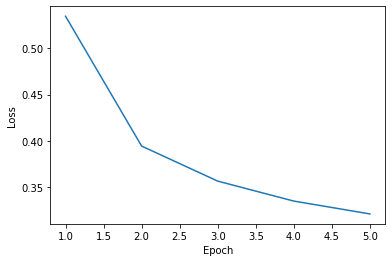

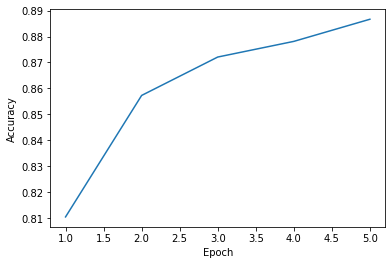

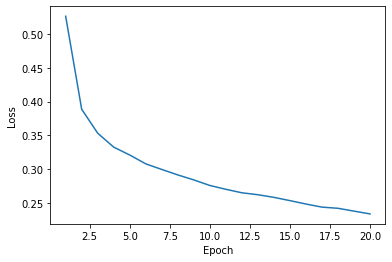

In [ ]:
###########################################################################
#신경망 모델 훈련

#손실 곡선
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42) #검증 세트 덜어내기

def model_fn(a_layer = None):   #모델을 만드는 간단한 함수를 정의해보자
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28, 28)))
  model.add(keras.layers.Dense(100, activation = "relu"))
  if a_layer:
    model.add(a_layer)  #해당 함수의 매개변수로 케라스 층을 추가하면 은닉층 뒤에 층 하나를 추가
  model.add(keras.layers.Dense(10, activation = "softmax"))
  return model

model = model_fn()
model.summary()

model.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0) #모델 훈련, 훈련 결과를 변수에 담아보자
#verbose 매개변수 : 0,1,2 입력가능. 기본값은 1이며, 0을 입력하면 훈련과정을 표시하지 않는다

print(history.history.keys()) #history 객체에는 history라는 딕셔너리가 저장되어 있다.
                              #우리가 metrics에 "accuracy"를 추가했기 때문에 손실과 정확도 2개 출력됨

import matplotlib.pyplot as plt
plt.plot(range(1,6),history.history["loss"])    #에포크마다 계산된 손실을 그래프로 그려보자
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.plot(range(1,6),history.history["accuracy"])    #에포크마다 계산된 정확도를 그래프로 그려보자
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

#에포크를 20번으로 늘린 모델을 훈련시켜 손실 그래프를 그려보자
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)
plt.plot(range(1,21),history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


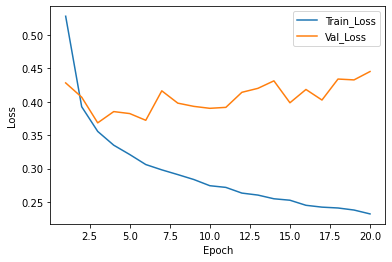

In [ ]:
###########################################################################
#검증 손실              #긴 실행 시간으로 따로 작성하였음
#인공신경망 모델이 최적화하는 대상은 정확도가 아니라 손실함수임. 
#따라서 과대/과소적합 여부도 손실을 토대로 판단해보자

model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, 
                    validation_data = (val_scaled, val_target))
print(history.history.keys()) #history 딕셔너리의 keys 확인

plt.plot(range(1,21), history.history["loss"])
plt.plot(range(1,21), history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train_Loss", "Val_Loss"])
plt.show()      #에포크가 많아질수록 과대적합. 검증세트에 대한 손실은 점점 늘어남



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


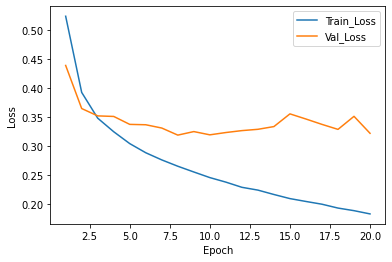

In [ ]:
#긴 실행 시간으로 따로 작성하였음
#옵티마이저를 Adam으로 변경하여 모델을 만들어보자. 
#Adam은 적응적 학습률을 사용하기 떄문에 에포크가 진행되면서 학습률의 크기를 조절할 수 있음

model = model_fn()
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, 
                    validation_data = (val_scaled, val_target))
print(history.history.keys()) #history 딕셔너리의 keys 확인

plt.plot(range(1,21), history.history["loss"])
plt.plot(range(1,21), history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train_Loss", "Val_Loss"])
plt.show()

#검증세트에 대한 손실의 반등이 이전 모델보다 비교적 완화됨 (과대적합이 훨씬 줄음)
#더 나은 손실곡선을 얻기 위해서는 학습률을 조정할 수도 있음

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


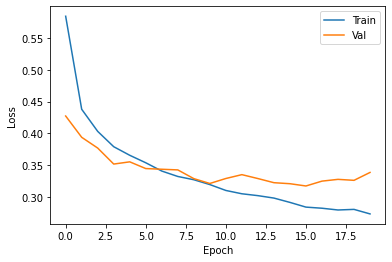

In [ ]:
###########################################################################
#드롭아웃 (Dropout)
#훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(뉴런의 출력을 0으로 만들어서) 과대적합을 막는다

#케라스에서는 드롭아웃을 keras.layers 패키지 아래 Dropout() 클래스로 제공한다.
#어떤 층 뒤에 드롭아웃 층을 두어 사용한다. 드롭아웃이 층처럼 사용되지만 훈련되는 모델 파라미터는 없다.
#드롭아웃 클래스 안에 들어가는 매개변수는 드롭아웃할 비율이다.

model = model_fn(keras.layers.Dropout(0.3)) #30% 드롭아웃
model.summary() #Dropout 층이 추가된 것을 확인, Dropout 층의 모델 파라미터 갯수는 0개
#훈련이 끝난 뒤 평가나 예측을 수행할 때는 드롭아웃을 적용하지 않음

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Val"])
plt.show()


In [ ]:
###########################################################################
#모델 저장과 복원
#에포크 횟수를 10으로 지정하고 다시 훈련시켜보자

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 10, verbose = 0, 
                   validation_data=(val_scaled, val_target))

model.save_weights("model-weights.h5")  #save_weights 메서드로 모델의 파라미터 저장/확장자가 ".h5"일 경우 HDF5 포맷을 저장
model.save("model-whole.h5")  #save 메서드로 모델 구조와 모델 파라미터를 함께 저장함

!ls -al *.h5      #셸 명령 수행, 저장된 모델 파일들 확인

In [ ]:
# 훈련하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 모델 파라미터를 읽어서 사용해보자
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights("model-weights.h5")    #load_weights 메서드, 저장된 모델 파라미터 불러오기
                                          #이때 save_weights 메서드로 저장했던 모델과 정확히 같은 구조를 지녀야함

#evaluate() 메서드를 사용하지 않고 샘플별로 클래스에 대한 확률 중 가장 큰 값의 인덱스를 골라 정확도를 계산해보자
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_labels == val_target))

#모델 전체를 저장한 파일을 불러와 검증세트의 정확도를 출력해보자
model = keras.models.load_model("model-whole.h5") #load_model 메서드, 모델이 저장된 파일을 읽음
model.evaluate(val_scaled, val_target)  #정확도 출력, 위의 정확도와 동일한 값 출력


0.8749166666666667
375/375 [==============================] - 1s 1ms/step - loss: 0.3539 - accuracy: 0.8749


[0.35394567251205444, 0.874916672706604]

In [ ]:
###########################################################################
#콜백 (Callback)
#훈련 과정 중간에 어떤 작업을 수행할 수 있게 해주는 객체. fit 메서드의 callbacks 매개변수에 리스트로 전달하여 사용

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.h5", save_best_only = True)
#ModelCheckpoint 콜백: 기본적으로 에포크마다 모델을 저장함
#save_best_only = True로 가장 낮은 검증 점수를 만드는 모델 저장
model.fit(train_scaled, train_target, epochs=20, verbose = 0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

model = keras.models.load_model("best-model.h5")  #가장 낮은 검증점수를 낸 모델 불러오기
model.evaluate(val_scaled, val_target)    #모델 평가



375/375 [==============================] - 1s 1ms/step - loss: 0.3144 - accuracy: 0.8878


[0.3143917918205261, 0.8877500295639038]

11


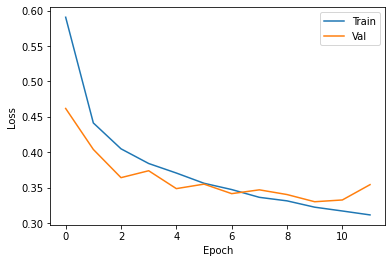

375/375 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8842


[0.3300495147705078, 0.8841666579246521]

In [ ]:
#조기종료 (Early Stopping)
#과대적합이 시작되기 전에 훈련을 미리 중지하는 것

#EarlyStopping 콜백
#patience 매개변수 2로 설정: 2번 연속 검증점수가 향상되지 않으면 훈련을 중지
#resotre_beset_weights 매개변수 True로 설정: 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose = 0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

print(early_stopping_cb.stopped_epoch)  #몇번째 에포크에서 훈련이 중지되었는지 확인

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Val"])
plt.show()          #에포크별 검증 점수 변화 확인

model.evaluate(val_scaled, val_target)    #검증 세트에 대한 성능 확인

###########################################################################
#최상의 신경망 모델 얻기



**===================================================================================================**